In [3]:
import pandas as pd
import numpy as np

In [6]:
load_data=pd.read_csv('../dataset/hourly_metered_load.csv')
lmp_data=pd.read_csv('../dataset/pjm_data_COMED.csv')

In [7]:
def load_data_info(data, flag):    
    # 查看 "zone" 列的唯一值
    print("******************************************")
    unique_flags = data[flag].unique()
    print("唯一值列表：", unique_flags)

    # 统计 "zone" 列的唯一值数量
    flag_count = data[flag].nunique()
    print("唯一值数量：", flag_count)

    # 统计每个 "zone" 的出现次数
    flag_value_counts = data[flag].value_counts()
    print("每个唯一值出现的次数：")
    print(flag_value_counts)

In [8]:
load_data_info(load_data, 'zone')
load_data_info(lmp_data, 'zone')
# Chicago code is 'CE' and 'COMED'

******************************************
唯一值列表： ['AE' 'AEP' 'AP' 'BC' 'CE' 'DAY' 'DEOK' 'DOM' 'DPL' 'DUQ' 'EKPC' 'JC' 'ME'
 'ATSI' 'OVEC' 'PE' 'PEP' 'PL' 'PN' 'PS' 'RECO' 'RTO']
唯一值数量： 22
每个唯一值出现的次数：
zone
AEP     2688
AE      1344
PL      1344
PEP     1344
DPL     1344
ATSI    1344
ME       672
RECO     672
PS       672
PN       672
PE       672
OVEC     672
JC       672
EKPC     672
DUQ      672
DOM      672
DEOK     672
DAY      672
CE       672
BC       672
AP       672
RTO      672
Name: count, dtype: int64
******************************************
唯一值列表： ['COMED']
唯一值数量： 1
每个唯一值出现的次数：
zone
COMED    938784
Name: count, dtype: int64


In [9]:
load_chicago=load_data[load_data['zone']=='CE']
print(load_chicago.head())
print('shape of load_chicago',load_chicago.shape)
print('************************************')
lmp_chicago=lmp_data[lmp_data['zone']=='COMED']
print(lmp_chicago.head())
print('shape of lmp_chicago',lmp_chicago.shape)

    datetime_beginning_utc datetime_beginning_ept nerc_region mkt_region zone  \
7      2025-02-01T05:00:00    2025-02-01T00:00:00         RFC       WEST   CE   
37     2025-02-01T06:00:00    2025-02-01T01:00:00         RFC       WEST   CE   
67     2025-02-01T07:00:00    2025-02-01T02:00:00         RFC       WEST   CE   
97     2025-02-01T08:00:00    2025-02-01T03:00:00         RFC       WEST   CE   
127    2025-02-01T09:00:00    2025-02-01T04:00:00         RFC       WEST   CE   

    load_area         mw  is_verified  
7          CE  10278.035         True  
37         CE  10012.432         True  
67         CE   9781.157         True  
97         CE   9669.064         True  
127        CE   9622.975         True  
shape of load_chicago (672, 8)
************************************
  datetime_beginning_utc datetime_beginning_ept  pnode_id pnode_name voltage  \
0   2/1/2025 12:00:00 AM   1/31/2025 7:00:00 PM  32406699   1 LASALL   24 KV   
1   2/1/2025 12:00:00 AM   1/31/2025 7:00:00 

In [10]:
# preprocess the data
# for load data we keep the following columns:
#   1.datetime_beginning_ept (时间戳)
#   3.mw (负载量)

# for lmp data we keep the following columns:
#   1.datetime_beginning_ept (时间戳)
#   2.pnode_id (节点)
#   3.total_lmp_da (日前市场总电价)
#   optional：congestion_price_da, marginal_loss_price_da (如果想分析这些因素对价格的影响)

load_chicago=load_chicago[['datetime_beginning_ept','mw']]
lmp_chicago=lmp_chicago[['datetime_beginning_ept','pnode_id','total_lmp_da']]
print(load_chicago.head())
print(lmp_chicago.head())
load_data_info(load_chicago,'datetime_beginning_ept')
load_data_info(lmp_chicago,'datetime_beginning_ept')


    datetime_beginning_ept         mw
7      2025-02-01T00:00:00  10278.035
37     2025-02-01T01:00:00  10012.432
67     2025-02-01T02:00:00   9781.157
97     2025-02-01T03:00:00   9669.064
127    2025-02-01T04:00:00   9622.975
  datetime_beginning_ept  pnode_id  total_lmp_da
0   1/31/2025 7:00:00 PM  32406699         28.07
1   1/31/2025 7:00:00 PM  32406701         28.07
2   1/31/2025 7:00:00 PM  32406703         27.90
3   1/31/2025 7:00:00 PM  32406705         27.90
4   1/31/2025 7:00:00 PM  32406707         28.07
******************************************
唯一值列表： ['2025-02-01T00:00:00' '2025-02-01T01:00:00' '2025-02-01T02:00:00'
 '2025-02-01T03:00:00' '2025-02-01T04:00:00' '2025-02-01T05:00:00'
 '2025-02-01T06:00:00' '2025-02-01T07:00:00' '2025-02-01T08:00:00'
 '2025-02-01T09:00:00' '2025-02-01T10:00:00' '2025-02-01T11:00:00'
 '2025-02-01T12:00:00' '2025-02-01T13:00:00' '2025-02-01T14:00:00'
 '2025-02-01T15:00:00' '2025-02-01T16:00:00' '2025-02-01T17:00:00'
 '2025-02-01T18:00:00' '20

Load数据列名: ['mw']
LMP数据列名: ['pnode_id', 'total_lmp_da']


findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

匹配统计:
LMP总行数: 938784
成功匹配负载的行数: 931799
未匹配负载的行数: 6985
匹配率: 99.26%
原始数据行数: 938784
过滤后数据行数: 931799

过滤后的数据前5行:
                        pnode_id  total_lmp_da  zone_load
datetime_beginning_ept                                   
2025-02-01              32406699         20.54  10278.035
2025-02-01              32406701         20.54  10278.035
2025-02-01              32406703         20.55  10278.035
2025-02-01              32406705         20.55  10278.035
2025-02-01              32406707         20.54  10278.035


findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

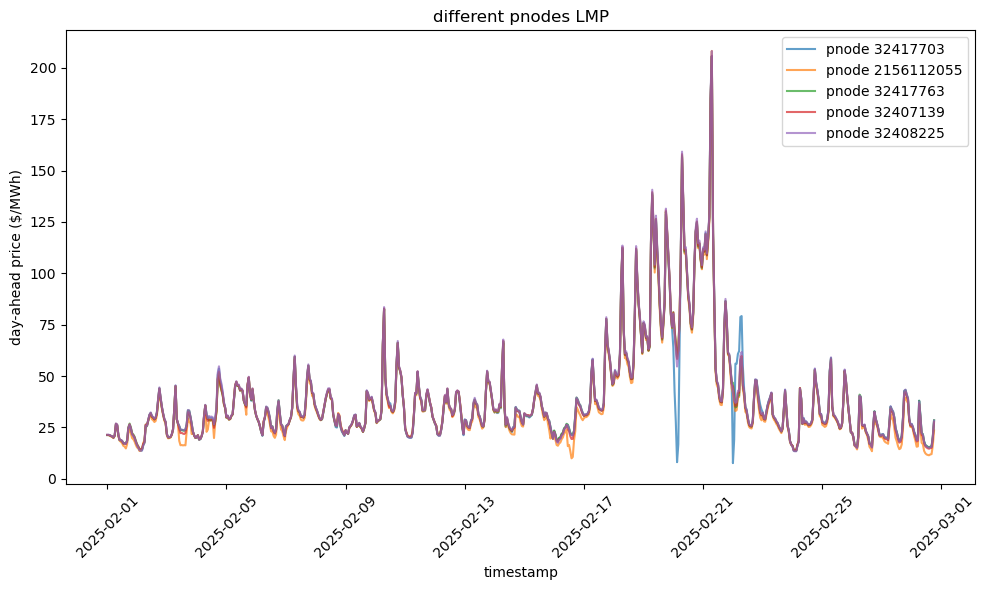

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 检查数据框的当前结构
print("Load数据列名:", load_chicago.columns.tolist())
print("LMP数据列名:", lmp_chicago.columns.tolist())

# 2. 确保时间是索引，或将时间列设为索引
# 如果时间列还不是索引
if not isinstance(load_chicago.index, pd.DatetimeIndex):
    # 查找时间列
    time_col_load = "datetime_beginning_ept"
    load_chicago[time_col_load] = pd.to_datetime(load_chicago[time_col_load])
    load_chicago = load_chicago.set_index(time_col_load)

if not isinstance(lmp_chicago.index, pd.DatetimeIndex):
    # 查找时间列
    time_col_lmp = "datetime_beginning_ept"
    lmp_chicago[time_col_lmp] = pd.to_datetime(lmp_chicago[time_col_lmp])
    lmp_chicago = lmp_chicago.set_index(time_col_lmp)

# 创建一个映射字典，将时间戳映射到对应的负载值
load_dict = load_chicago['mw'].to_dict()

# 使用reindex将负载数据添加到LMP数据中
# 创建一个新的列，根据时间索引填充负载值
lmp_with_load = lmp_chicago.copy()
lmp_with_load['zone_load'] = lmp_with_load.index.map(lambda x: load_dict.get(x, np.nan))

# 4. 检查匹配情况
match_stats = {
    "LMP总行数": len(lmp_with_load),
    "成功匹配负载的行数": lmp_with_load['zone_load'].notna().sum(),
    "未匹配负载的行数": lmp_with_load['zone_load'].isna().sum(),
    "匹配率": lmp_with_load['zone_load'].notna().sum() / len(lmp_with_load) * 100
}

print("匹配统计:")
for key, value in match_stats.items():
    if "率" in key:
        print(f"{key}: {value:.2f}%")
    else:
        print(f"{key}: {value}")

# 创建一个新的数据框，只包含zone_load非空的行
lmp_with_load_filtered = lmp_with_load[lmp_with_load['zone_load'].notna()].copy()

# 显示结果
print(f"原始数据行数: {len(lmp_with_load)}")
print(f"过滤后数据行数: {len(lmp_with_load_filtered)}")
print("\n过滤后的数据前5行:")
print(lmp_with_load_filtered.head())

# 6. 数据可视化分析
plt.rcParams['font.sans-serif'] = ['Arial']  # 用来正常显示label
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(10, 6))
# 随机选择5个不同的pnode进行可视化
if 'pnode_id' in lmp_with_load_filtered.columns:
    pnodes = lmp_with_load_filtered['pnode_id'].unique()
    sample_pnodes = np.random.choice(pnodes, min(5, len(pnodes)), replace=False)
    
    for pnode in sample_pnodes:
        pnode_data = lmp_with_load_filtered[lmp_with_load_filtered['pnode_id'] == pnode]
        plt.plot(pnode_data.index, pnode_data['total_lmp_da'], 
                 label=f'pnode {pnode}', alpha=0.7)
    
    plt.title('different pnodes LMP')
    plt.xlabel('timestamp')
    plt.ylabel('day-ahead price ($/MWh)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [26]:
# 5. 处理未匹配的情况
if match_stats["未匹配负载的行数"] > 0:
    print("\n发现未匹配记录，可能原因:")
    print("1. LMP数据包含负载数据中不存在的时间戳")
    print("2. 时间戳格式不完全一致（可能存在微小差异）")
    
    # 检查未匹配时间戳的分布情况
    unmatched_times = lmp_with_load[lmp_with_load['zone_load'].isna()].index
    print(f"\n未匹配时间戳示例（前5个）: {list(unmatched_times)[:5]}")
    
    # 5.1 决定如何处理未匹配记录
    handle_unmatched = input("如何处理未匹配记录？(1: 删除, 2: 填充, 3: 保留为NaN): ")
    
    if handle_unmatched == "1":
        # 删除未匹配记录
        lmp_with_load = lmp_with_load.dropna(subset=['zone_load'])
        print(f"已删除未匹配记录，剩余记录数: {len(lmp_with_load)}")
    
    elif handle_unmatched == "2":
        # 填充未匹配记录
        fill_method = input("填充方法 (mean: 均值, median: 中位数, ffill: 前向填充, bfill: 后向填充): ")
        
        if fill_method == "mean":
            lmp_with_load['zone_load'] = lmp_with_load['zone_load'].fillna(lmp_with_load['zone_load'].mean())
        elif fill_method == "median":
            lmp_with_load['zone_load'] = lmp_with_load['zone_load'].fillna(lmp_with_load['zone_load'].median())
        elif fill_method == "ffill":
            lmp_with_load['zone_load'] = lmp_with_load['zone_load'].fillna(method='ffill')
        elif fill_method == "bfill":
            lmp_with_load['zone_load'] = lmp_with_load['zone_load'].fillna(method='bfill')
        
        print(f"已填充未匹配记录，现在包含NaN的记录数: {lmp_with_load['zone_load'].isna().sum()}")


发现未匹配记录，可能原因:
1. LMP数据包含负载数据中不存在的时间戳
2. 时间戳格式不完全一致（可能存在微小差异）

未匹配时间戳示例（前5个）: []
已删除未匹配记录，剩余记录数: 931799


In [28]:
# preprocess the data
min_load = lmp_with_load['zone_load'].min()
min_lmp = lmp_with_load['total_lmp_da'].min()
    
# 对数变换处理
if min_load <= 0:
    offset = abs(min_load) + 1
    lmp_with_load['zone_load_log'] = np.log(lmp_with_load['zone_load'] + offset)
    print(f"负载数据包含非正值，应用对数变换前添加了{offset}的偏移量")
else:
    lmp_with_load['zone_load_log'] = np.log(lmp_with_load['zone_load'])
    
if min_lmp <= 0:
    offset = abs(min_lmp) + 1
    lmp_with_load['total_lmp_da_log'] = np.log(lmp_with_load['total_lmp_da'] + offset)
    print(f"价格数据包含非正值，应用对数变换前添加了{offset}的偏移量")
else:
    lmp_with_load['total_lmp_da_log'] = np.log(lmp_with_load['total_lmp_da'])
    
# 6.2 标准化/归一化
scalers = {}
    
for col in ['zone_load', 'total_lmp_da']:
    # 如果存在对数变换列，则对对数变换列进行标准化
    if f"{col}_log" in lmp_with_load.columns:
        target_col = f"{col}_log"
    else:
        target_col = col
        
    # 应用MinMaxScaler
    scaler = MinMaxScaler()
    lmp_with_load[f"{target_col}_norm"] = scaler.fit_transform(lmp_with_load[[target_col]])
        
    # 保存scaler以便将来使用
    scalers[target_col] = scaler
# print(lmp_with_load.head())
print("已完成数据标准化/归一化")
processed_load=lmp_with_load[['pnode_id', 'zone_load_log_norm', 'total_lmp_da_log_norm']].copy()
# 6.3 添加时间特征
processed_load['hour'] = processed_load.index.hour
processed_load['day_of_week'] = processed_load.index.dayofweek
processed_load['month'] = processed_load.index.month
processed_load['is_weekend'] = (processed_load.index.dayofweek >= 5).astype(int)
    
print("已添加时间特征")

# 7. 最终检查和保存
print("\n最终数据集信息:")
print(f"总行数: {len(processed_load)}")
print(f"列数: {len(processed_load.columns)}")
print(f"列名: {processed_load.columns.tolist()}")
print("\n数据预览:")
print(processed_load.head())

# 保存处理后的数据
save_data = input("是否保存处理后的数据？(y/n): ")
if save_data.lower() == "y":
    filename = input("请输入文件名（包含扩展名）: ")
    processed_load.to_csv(filename)
    print(f"数据已保存到 {filename}")

价格数据包含非正值，应用对数变换前添加了73.4的偏移量
已完成数据标准化/归一化
已添加时间特征

最终数据集信息:
总行数: 931799
列数: 7
列名: ['pnode_id', 'zone_load_log_norm', 'total_lmp_da_log_norm', 'hour', 'day_of_week', 'month', 'is_weekend']

数据预览:
                        pnode_id  zone_load_log_norm  total_lmp_da_log_norm  \
datetime_beginning_ept                                                        
2025-02-01              32406699            0.332639               0.801274   
2025-02-01              32406701            0.332639               0.801274   
2025-02-01              32406703            0.332639               0.801292   
2025-02-01              32406705            0.332639               0.801292   
2025-02-01              32406707            0.332639               0.801274   

                        hour  day_of_week  month  is_weekend  
datetime_beginning_ept                                        
2025-02-01                 0            5      2           1  
2025-02-01                 0            5      2           1  

In [ ]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def wavelet_decompose(data, wavelet='db4', level=2):
    """
    use wavelet transform to decompose the data
    :param:
        data: input data
        wavelet: wavelet function
        level: decomposition level
    :return:
        low_freq: low frequency part
        high_freq: high frequency part
    """
    coeffs = pywt.wavedec(data, wavelet, level=level)

    low_freq = coeffs[0]  # low frequency part
    
    # create a new coeffs list with zeros for low frequency parts only
    high_freq = [np.zeros_like(coeffs[0])]+coeffs[1:]
    high_freq_coeffs = pywt.waverec(high_freq, wavelet)
    high_freq = high_freq[:len(data)] # cut off to ensure the length is same as original data

    # rebuild the low frequency part
    # create a new coeffs list with zeros for high frequency parts
    low_freq_coeffs = [coeffs[0]] + [np.zeros_like(c) for c in coeffs[1:]]
    low_freq = pywt.waverec(low_freq_coeffs, wavelet)
    low_freq = low_freq[:len(data)]
    
    return low_freq, high_freq

In [30]:
def wavelet_plot(dataset, low_freq, high_freq):
    """
    plot the original data and the decomposed data
    :param:
        dataset: input data
        low_freq: low frequency part
        high_freq: high frequency part
    """
    plt.figure(figsize=(12, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(dataset, label='Original LMP Data', color='blue')
    plt.title('Original Data')
    plt.xlabel('Time')
    plt.ylabel('LMP ($/MWh)')
    plt.legend()
    
    plt.subplot(3, 1, 2)
    plt.plot(low_freq, label='Low Frequency Part', color='orange')
    plt.title('Low Frequency Part')
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    plt.legend()
    
    plt.subplot(3, 1, 3)
    plt.plot(high_freq, label='High Frequency Part', color='red')
    plt.title('High Frequency Part')
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

ValueError: Input could not be cast to an at-least-1D NumPy array

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

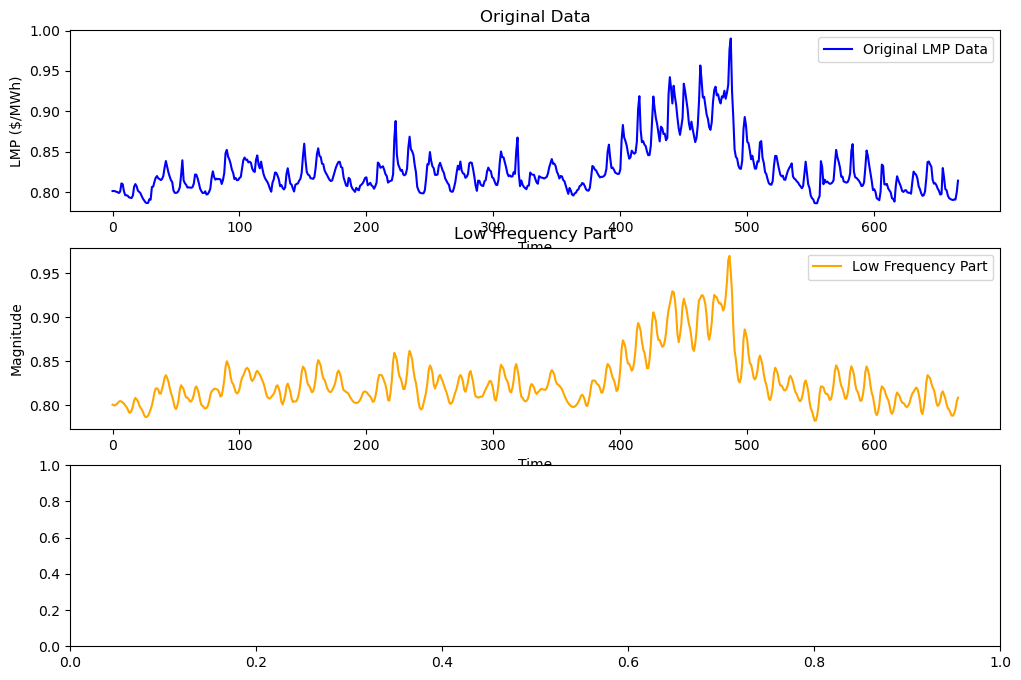

In [31]:
# wavelet decomposition
pnode_list = processed_load['pnode_id'].unique()
decomposition_results = {}

# traverse each pnode
for pnode in pnode_list:
    pnode_data = processed_load[processed_load['pnode_id'] == pnode]

    if len(pnode_data) < 24: # at least 24 hours of data
        print(f"pnode {pnode} has insufficient data for decomposition.")
        continue

    # extract the price series
    price_series = pnode_data['total_lmp_da_log_norm'].values
    
    # wavelet decomposition
    low_freq, high_freq = wavelet_decompose(price_series, wavelet='db4', level=2) # default value is 'db4' and '2'
    
    # store the results
    decomposition_results[pnode] = {
        'price_series': price_series,
        'low_freq': low_freq,
        'high_freq': high_freq
    }
    
    # plot the results
    for i in range(2):
        wavelet_plot(price_series, low_freq, high_freq)
